In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Data Cleaning

In [3]:
df=pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

This tells us the dataset has no missing values, but upon inspection, we see several columns having "?" as values.

In [6]:
df["workclass"]=df["workclass"].replace("?",np.nan)
df["occupation"]=df["occupation"].replace("?",np.nan)
df["native.country"]=df["native.country"].replace("?",np.nan)

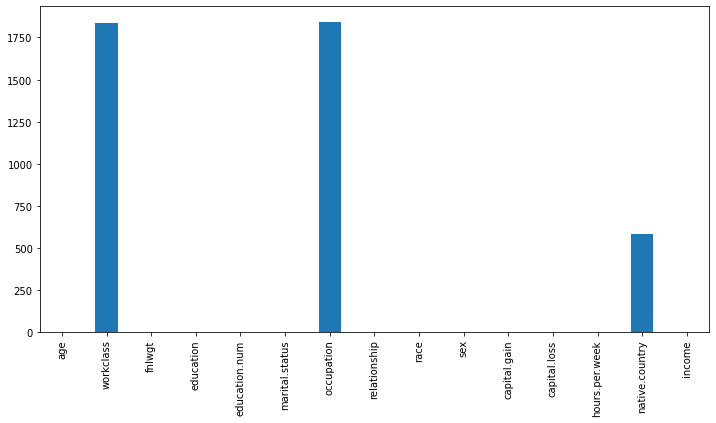

In [7]:
plt.figure(figsize = (12, 6))
df.isna().sum().plot.bar();

Let's see how much data we would lose if we just dropped the null values.

In [8]:
df2 = df.dropna()
percent_dropped = (df.shape[0] - df2.shape[0])/df.shape[0]*100
print(percent_dropped)

7.367709836921471


7% is significant so let's replace the values with the mode of each column

In [9]:
df["workclass"]=df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"]=df["occupation"].fillna(df["occupation"].mode()[0])
df["native.country"]=df["native.country"].fillna(df["native.country"].mode()[0])

We should also check for duplicates and only keep one of each unique value.

In [10]:
df.duplicated().sum()

24

In [11]:
df=df.drop_duplicates(keep="first")

In [12]:
cat_feats = df.select_dtypes(include=['object']); cat_feats.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [13]:
df["education"].value_counts() 

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [14]:
df = df.drop(['education','fnlwgt'], axis=1);df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
income_mapper = {'<=50K':0,'>50K':1}
df['income'] = df['income'].map(income_mapper)
df['native.country']=np.where(df["native.country"]=='United-States',1,0)
df['sex']=np.where(df["sex"]=="Male", 1, 0)
df = df.rename(columns={"native.country":"native", "sex":"male"})
categorical_columns =['workclass','marital.status','occupation','relationship','race']
for col in categorical_columns:
    cat_list = pd.get_dummies(df[col], prefix=col)
    df=df.join(cat_list)
df = df.drop(columns=categorical_columns)
df

,age,education.num,male,capital.gain,capital.loss,hours.per.week,native,income,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,90,9,0,0,4356,40,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,82,9,0,0,4356,18,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,66,10,0,0,4356,40,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,54,4,0,0,3900,40,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,41,10,0,0,3900,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,1,0,0,40,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32557,27,12,0,0,0,38,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32558,40,9,1,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,58,9,0,0,0,40,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [16]:
income_df = df.drop(columns=['relationship_Husband','relationship_Unmarried', 'relationship_Wife']); income_df

,age,education.num,male,capital.gain,capital.loss,hours.per.week,native,income,workclass_Federal-gov,workclass_Local-gov,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,90,9,0,0,4356,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,82,9,0,0,4356,18,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,66,10,0,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,0,3900,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,41,10,0,0,3900,40,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,1,0,0,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32557,27,12,0,0,0,38,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32558,40,9,1,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,58,9,0,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Feature Selection

In [17]:
#income_df = pd.read_csv('income_numerical2.csv', index_col=0); 
income_df

,age,education.num,male,capital.gain,capital.loss,hours.per.week,native,income,workclass_Federal-gov,workclass_Local-gov,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,90,9,0,0,4356,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,82,9,0,0,4356,18,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,66,10,0,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,0,3900,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,41,10,0,0,3900,40,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,1,0,0,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32557,27,12,0,0,0,38,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32558,40,9,1,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,58,9,0,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
income_df.columns

Index(['age', 'education.num', 'male', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-su

(45, 45)


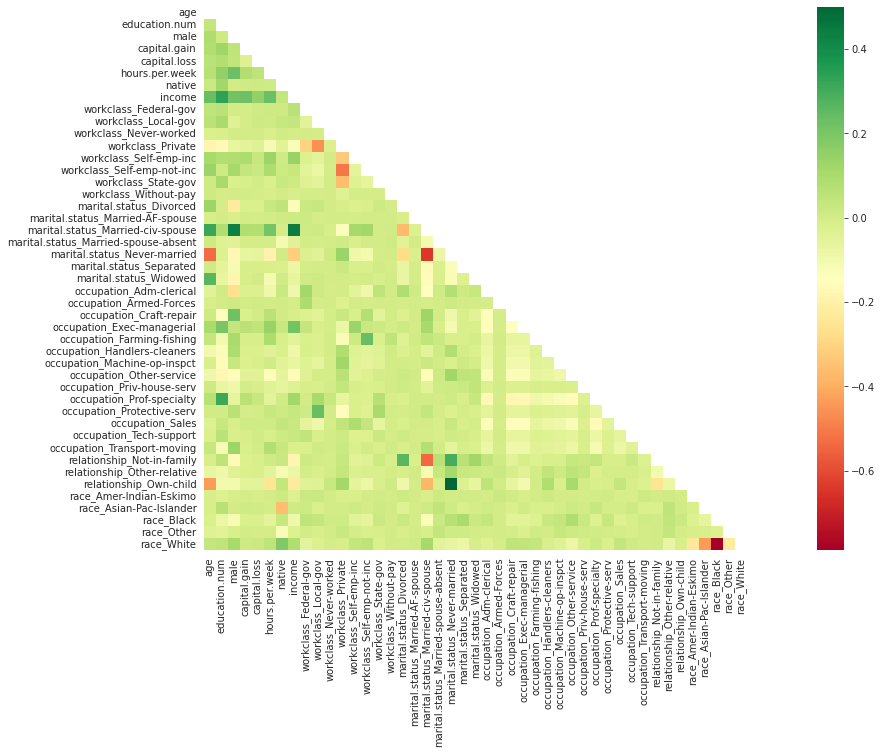

In [19]:
corr = income_df.corr()
print(corr.shape)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True, cmap='RdYlGn')
#plt.savefig('multi4.png')
plt.show()

In [20]:
X = income_df.drop('income', axis=1)
y = income_df['income']

In [21]:
from sklearn.ensemble import RandomForestClassifier
selector = RandomForestClassifier(random_state=42)

selector.fit(X, y)

RandomForestClassifier(random_state=42)

In [24]:
feature_imp = selector.feature_importances_

In [25]:
len(feature_imp)

44

In [26]:
top44 = feature_imp.argsort()[::-1][:44]; top44

array([ 0,  1,  5,  3, 17,  4, 19,  2, 25, 36, 31, 15, 38, 10,  6, 29, 12,
       33, 43, 24, 11,  8, 22, 41,  7, 34, 35, 13, 26, 28, 40, 27, 32, 20,
       21, 37, 39, 18, 42, 16, 30, 14, 23,  9], dtype=int64)

In [27]:
cols = X.columns[top44]; cols

Index(['age', 'education.num', 'hours.per.week', 'capital.gain',
       'marital.status_Married-civ-spouse', 'capital.loss',
       'marital.status_Never-married', 'male', 'occupation_Exec-managerial',
       'relationship_Not-in-family', 'occupation_Prof-specialty',
       'marital.status_Divorced', 'relationship_Own-child',
       'workclass_Private', 'native', 'occupation_Other-service',
       'workclass_Self-emp-not-inc', 'occupation_Sales', 'race_White',
       'occupation_Craft-repair', 'workclass_Self-emp-inc',
       'workclass_Local-gov', 'occupation_Adm-clerical', 'race_Black',
       'workclass_Federal-gov', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_State-gov',
       'occupation_Farming-fishing', 'occupation_Machine-op-inspct',
       'race_Asian-Pac-Islander', 'occupation_Handlers-cleaners',
       'occupation_Protective-serv', 'marital.status_Separated',
       'marital.status_Widowed', 'relationship_Other-relative',
       'race_Amer-In

In [29]:
feature_imp[top44]

array([2.36592096e-01, 1.41009012e-01, 1.14690283e-01, 1.13901589e-01,
       9.06385645e-02, 3.86840081e-02, 3.75265196e-02, 2.08228669e-02,
       1.96337529e-02, 1.78520062e-02, 1.23027711e-02, 1.21172349e-02,
       1.13986658e-02, 1.02392968e-02, 9.31831984e-03, 8.66399781e-03,
       8.29263416e-03, 7.06410476e-03, 6.79671300e-03, 6.55278627e-03,
       6.50324919e-03, 5.83938230e-03, 5.70127890e-03, 5.41813897e-03,
       5.19566126e-03, 5.08438985e-03, 4.71904029e-03, 4.71038778e-03,
       4.59633879e-03, 4.24892817e-03, 3.88909176e-03, 3.37699153e-03,
       3.32858427e-03, 2.86096357e-03, 2.67019146e-03, 2.66188120e-03,
       1.55434917e-03, 1.50748065e-03, 1.05700818e-03, 7.13016989e-04,
       1.62989921e-04, 6.04110899e-05, 3.14588518e-05, 1.15628791e-05])

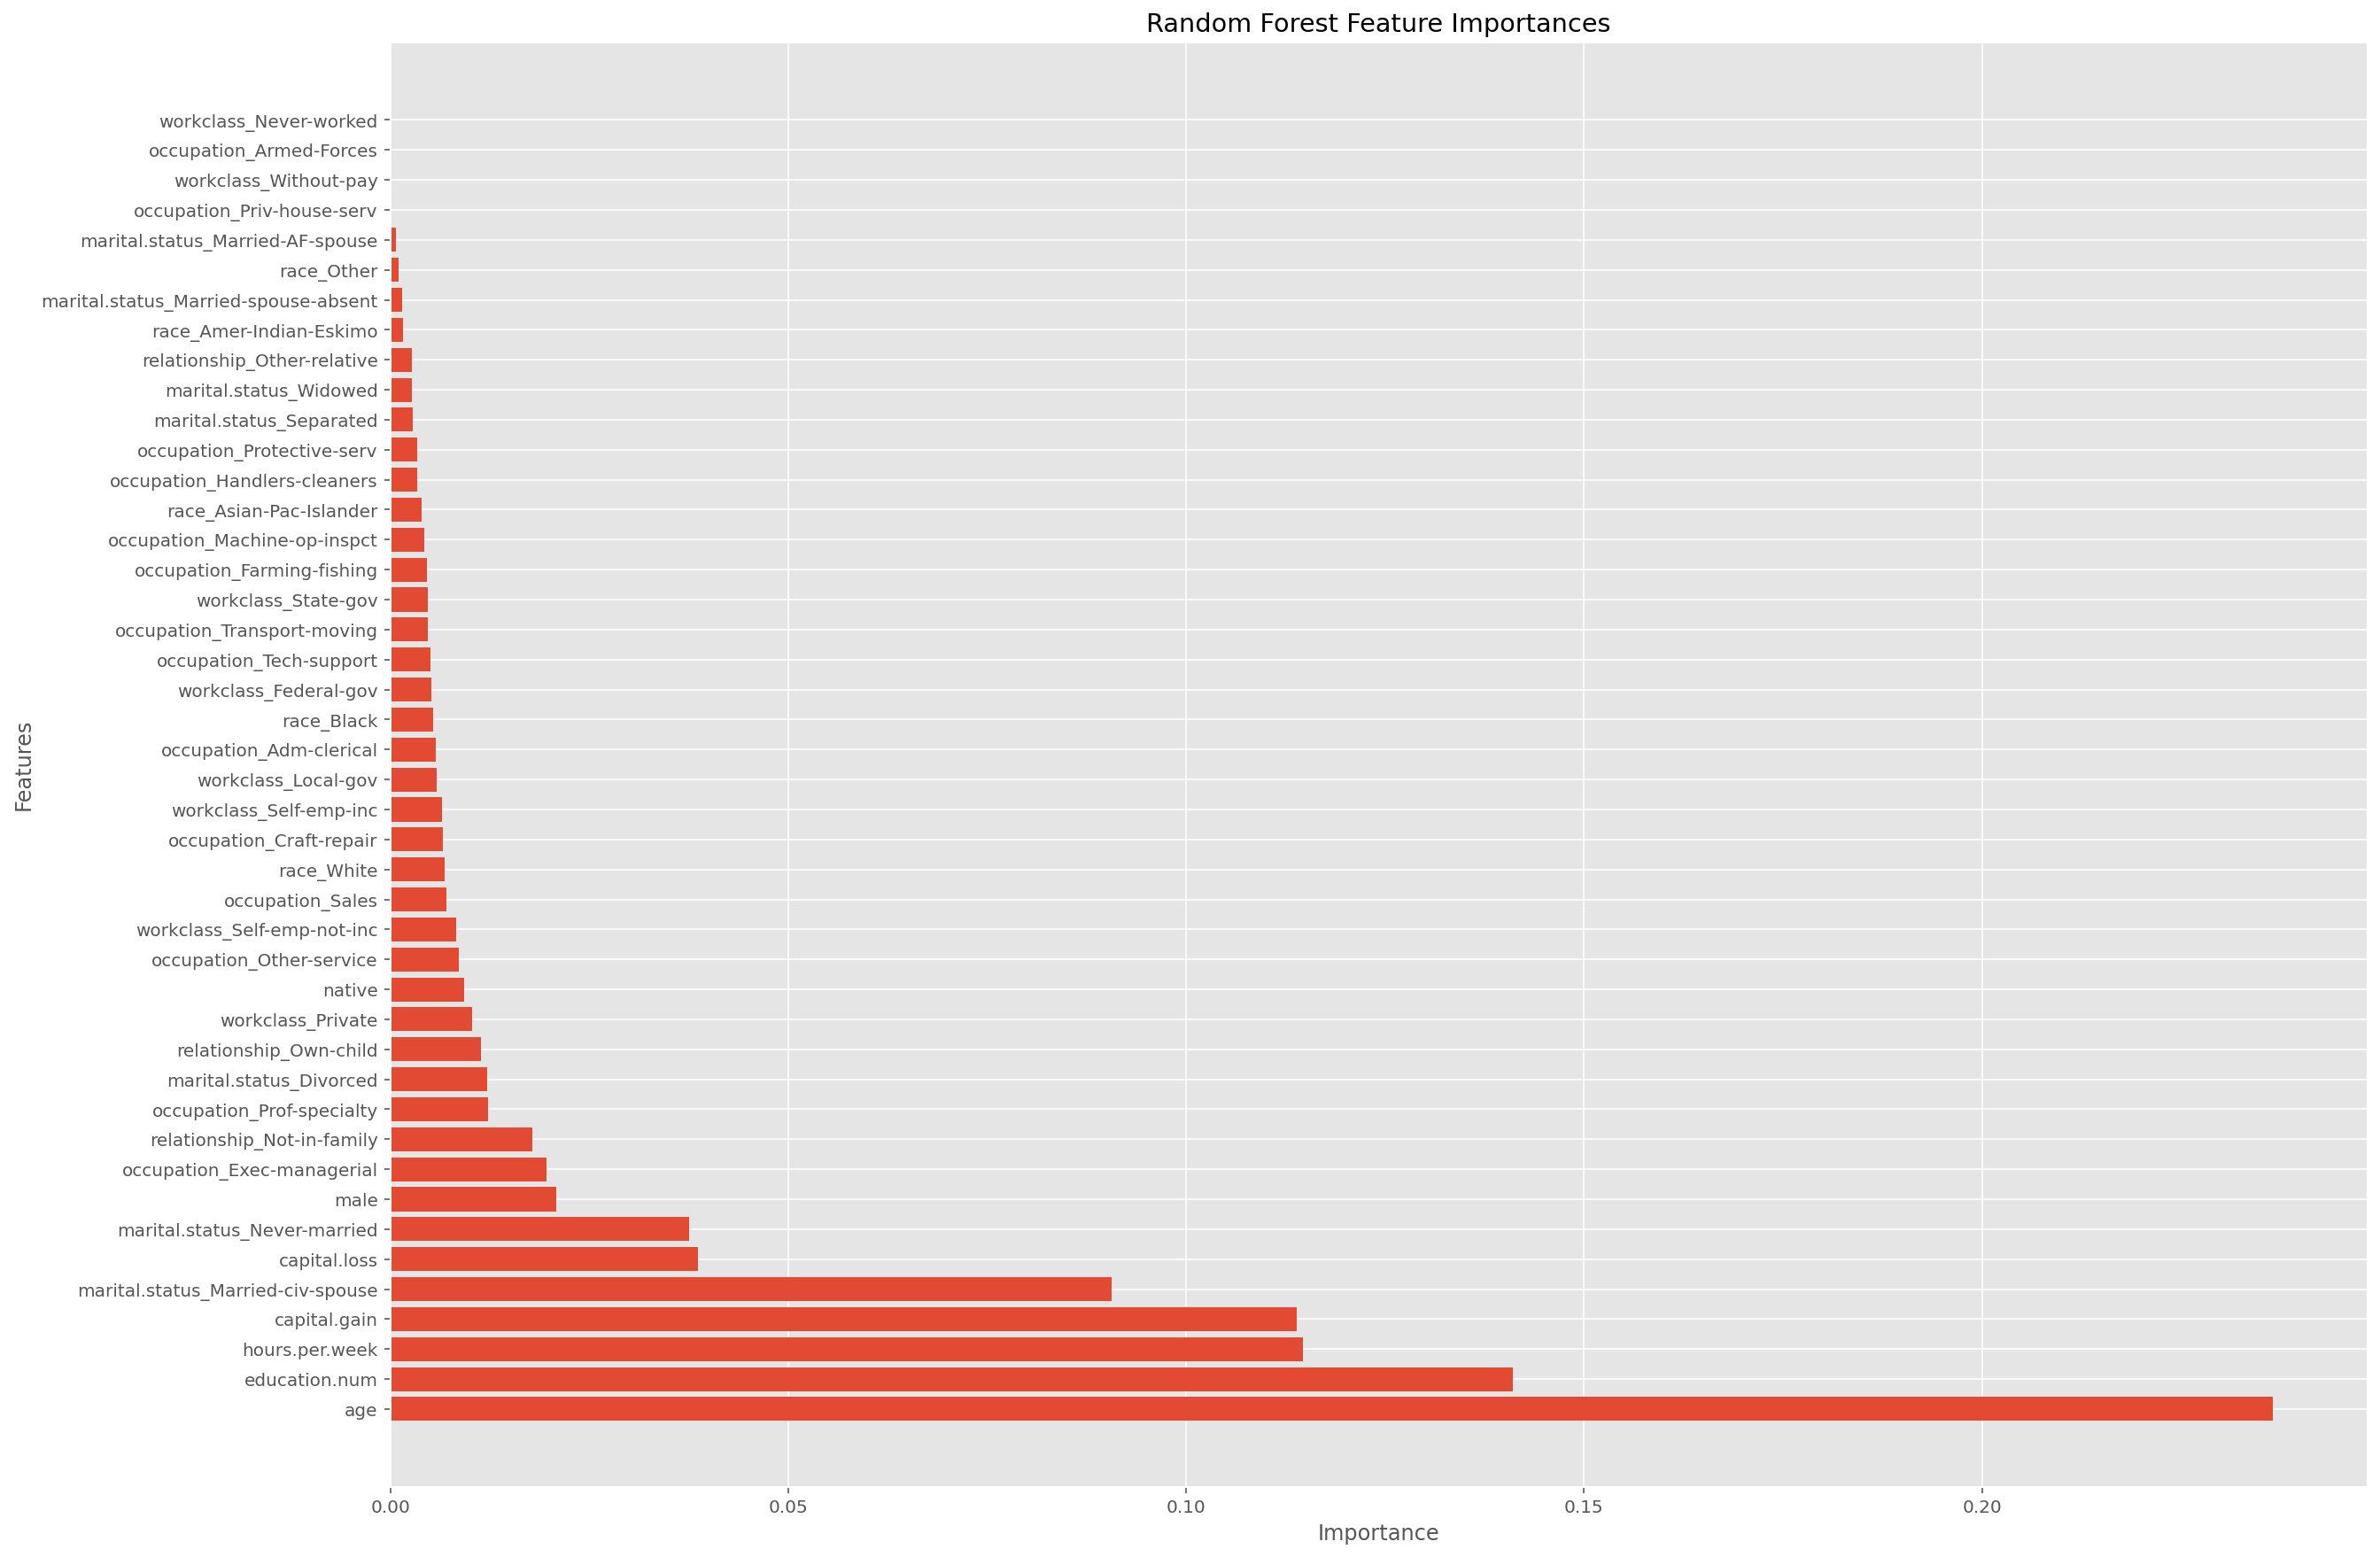

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):
    plt.figure(figsize=(20,15))
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    
plot_imp(np.array(cols), feature_imp[top44], 'Random Forest')

In [34]:
cols = list(cols)
cols.append('income')

In [35]:
i_df = income_df[cols]

In [36]:
i_df

,age,education.num,hours.per.week,capital.gain,marital.status_Married-civ-spouse,capital.loss,marital.status_Never-married,male,occupation_Exec-managerial,relationship_Not-in-family,...,relationship_Other-relative,race_Amer-Indian-Eskimo,marital.status_Married-spouse-absent,race_Other,marital.status_Married-AF-spouse,occupation_Priv-house-serv,workclass_Without-pay,occupation_Armed-Forces,workclass_Never-worked,income
0,90,9,40,0,0,4356,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,82,9,18,0,0,4356,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,66,10,40,0,0,4356,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,4,40,0,0,3900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41,10,40,0,0,3900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,40,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
32557,27,12,38,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,40,9,40,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,58,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Naive Bayes

In [23]:
# %run pre_process.py

Naive Bayes works to fit a probabilistic distribution for every feature for every class and uses probabilities of individual samples to make a class prediction. The type of distribution can vary - Gaussian is the most common.
<br> According to Bayes Theorem:
$$ P(y_i | x_1, x_2, ... , x_n) = \frac{P(x_1, x_2, ... x_n| y_i)*P(y_i)}{P(x_1, x_2,... x_n)}$$ <br>
We can get rid of the denominator because it stays constant for all classes, so we can normalize by removing it. If we assume every feature is independent, we can come up with the naive assumption:
$$ P(y_i | x_1, x_2, ... , x_n) = P(x_1|y_i)*P(x_2|y_i)*...*P(x_n|y_i)*P(y_i)$$
<br>
We can then calculate the class probability for each test sample and select the class with the highest probability.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [38]:
#train_df, test_df = train_test_split(income_df, test_size=0.2, random_state=42,stratify=income_df['income'])

In [5]:
train_df = pd.read_csv("train1.csv")
test_df = pd.read_csv("test1.csv")

In [6]:
train_df

,age,education.num,male,capital.gain,capital.loss,hours.per.week,native,income,workclass_Federal-gov,workclass_Local-gov,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,22,13,0,0,0,15,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,27,13,0,0,0,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,46,8,1,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35,10,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,62,10,1,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23171,32,10,0,0,0,42,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23172,28,15,1,0,0,50,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
23173,47,9,1,0,0,50,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
23174,42,9,1,0,0,30,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [7]:
X_dev = train_df.drop('income', axis=1)
y_dev = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

### Scaling

In [8]:
# scaler = MinMaxScaler()
# X_dev = scaler.fit_transform(X_dev)
# X_test = scaler.transform(X_test)

Scaling reduces performance significantly for Naive Bayes. This makes sense since the probability distribution is dependent on the range of values and scaling can alter the probability curve.

In [9]:
import time

### Gaussian Naive Bayes

In [10]:
gnb = GaussianNB()

gnb.fit(X_dev, y_dev)
gnb.score(X_test, y_test)

0.8170521228857439

In [11]:
gnb = GaussianNB()
print(f"Training on X_dev with {X_dev.shape[0]} samples")
t_start = time.time()
gnb.fit(X_dev, y_dev)
t_end = time.time()
print(f"Naive Bayes train time = {t_end - t_start}")
p_start = time.time()
ypred_gnb = gnb.predict(X_test)
p_end = time.time()
print(f"Naive Bayes prediction time = {p_end - p_start}")
print("Naive Bayes test accuracy = ", accuracy_score(y_test, ypred_gnb))
print('F1 score:', round(f1_score(y_test, ypred_gnb) * 100, 2))

Training on X_dev with 23176 samples
Naive Bayes train time = 0.025960683822631836
Naive Bayes prediction time = 0.008945703506469727
Naive Bayes test accuracy =  0.8170521228857439
F1 score: 66.16


### Gaussian Naive Bayes with SMOTE

In [12]:
smote = SMOTE(random_state=42)
gnb_pipe = imb_make_pipeline(smote, GaussianNB())

gnb_pipe.fit(X_dev, y_dev)
gnb_pipe.score(X_test, y_test)

0.7875388332758025

In [13]:
gnb = GaussianNB()
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)
print(f"Training on X_dev_smote with {X_dev_smote.shape[0]} samples")
t_start = time.time()
gnb.fit(X_dev_smote, y_dev_smote)
t_end = time.time()
print(f"Naive Bayes with SMOTE train time = {t_end - t_start}")
p_start = time.time()
ypred_gnb_smote = gnb.predict(X_test)
p_end = time.time()
print(f"Naive Bayes with SMOTE prediction time = {p_end - p_start}")
print("Naive Bayes test accuracy with SMOTE = ", accuracy_score(y_test, ypred_gnb_smote))
print('F1 score:', round(f1_score(y_test, ypred_gnb_smote) * 100, 2))

Training on X_dev_smote with 34864 samples
Naive Bayes with SMOTE train time = 0.05884265899658203
Naive Bayes with SMOTE prediction time = 0.009973764419555664
Naive Bayes test accuracy with SMOTE =  0.7875388332758025
F1 score: 65.7


### Gaussian Naive Bayes with Random Oversampling

In [14]:
ros = RandomOverSampler(random_state=42)
gnb_pipe2 = imb_make_pipeline(ros, GaussianNB())

gnb_pipe2.fit(X_dev, y_dev)
gnb_pipe2.score(X_test, y_test)

0.8130824991370383

In [15]:
gnb = GaussianNB()
ros = RandomOverSampler(random_state=42)
X_dev_ros, y_dev_ros = ros.fit_resample(X_dev, y_dev)
print(f"Training on X_dev_ros with {X_dev_ros.shape[0]} samples")
t_start = time.time()
gnb.fit(X_dev_ros, y_dev_ros)
t_end = time.time()
print(f"Naive Bayes with random oversampling train time = {t_end - t_start}")
p_start = time.time()
ypred_gnb_ros = gnb.predict(X_test)
p_end = time.time()
print(f"Naive Bayes with random oversampling prediction time = {p_end - p_start}")
print("Naive Bayes test accuracy with random oversampling = ", accuracy_score(y_test, ypred_gnb_ros))
print('F1 score:', round(f1_score(y_test, ypred_gnb_ros) * 100, 2))

Training on X_dev_ros with 34864 samples
Naive Bayes with random oversampling train time = 0.04188799858093262
Naive Bayes with random oversampling prediction time = 0.005983829498291016
Naive Bayes test accuracy with random oversampling =  0.8130824991370383
F1 score: 65.74


### Results
#### Gaussian Naive Bayes without sampling performed best
Sampling does not help in the case of Naive Bayes because the probability distributions change when we resample and that affects the accuracy of the distributions.

In [16]:
gnb = GaussianNB()

gnb.fit(X_dev, y_dev)
print('Naive Bayes Classifier:')
y_pred_gnb = gnb.predict(X_test)
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gnb) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_gnb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 81.71
F1 score: 66.16


#### Compare to Random Forest

In [17]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)
rf_best.fit(X_dev, y_dev)
rf_best.score(X_test, y_test)

0.834311356575768

In [18]:
print('Random Forest Classifier:')
y_pred = rf_best.predict(X_test)
print('Accuracy score:', round(accuracy_score(y_test, y_pred) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred) * 100, 2))

Random Forest Classifier:
Accuracy score: 83.43
F1 score: 64.37


In [20]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4358
           1       0.61      0.72      0.66      1436

    accuracy                           0.82      5794
   macro avg       0.76      0.79      0.77      5794
weighted avg       0.83      0.82      0.82      5794



Performance is very similar, in fact Naive Bayes has a higher F1 score than Random Forest. We can confidently say that the Naive Bayes Classifier can be used for this problem.

In [35]:
#import data1
train_df1 = pd.read_csv("train1.csv")
test_df1 = pd.read_csv("test1.csv")
train_x1 = train_df1.drop('income', axis=1)
train_y1 = train_df1['income']
test_x1 = test_df1.drop('income', axis=1)
test_y1 = test_df1['income']

In [36]:
def _cm(y_test,y_pred, model):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index = ['<=50K','>50K'], columns = ['<=50K','>50K'])
    plt.figure(figsize=(10,10))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"{model} confusion matrix")
    plt.show()

In [38]:
from models import run_GNB

results, ypred_gnb = run_GNB(train_x1,train_y1,test_x1,test_y1); results

{'Model': 'Naive Bayes',
 'Accuracy': 0.8170521228857439,
 'F1-Score': 0.6615581098339719,
 'Fit-Time': 0.026308900000003632,
 'Predict-Time': 0.006563399999777175}

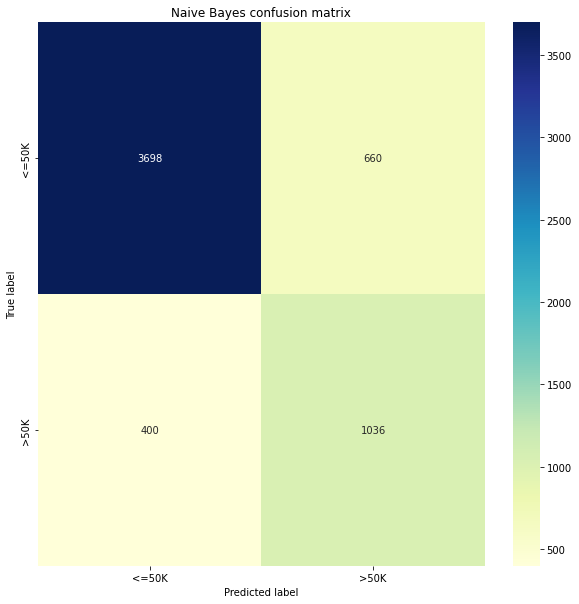

In [39]:
_cm(test_y1, ypred_gnb, "Naive Bayes")

# Logistic Regression

In [42]:
from models import lr

results, ypred_lr = lr(train_x1,train_y1,test_x1,test_y1); results

{'Model': 'LR',
 'Accuracy': 0.8425957887469796,
 'F1-Score': 0.6467854376452362,
 'Fit-Time': 0.4646809000000758,
 'Predict-Time': 0.0026953000001412875}

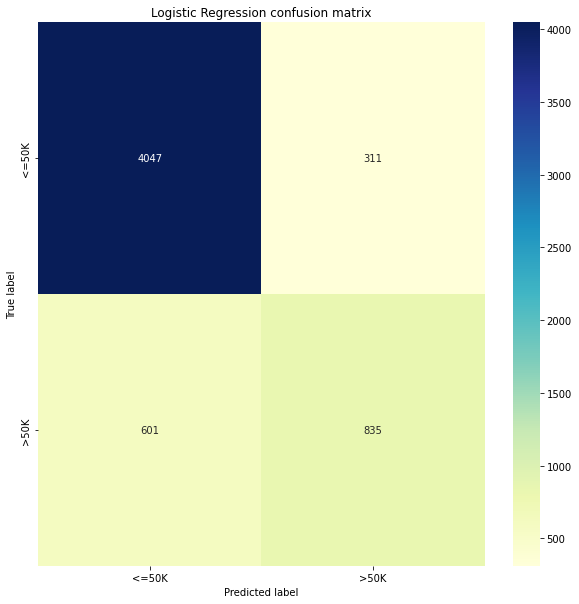

In [43]:
_cm(test_y1, ypred_lr, "Logistic Regression")

# Random Forest

In [44]:
from models import run_random_forest_smote

results, ypred_rf = run_random_forest_smote(train_x1,train_y1,test_x1,test_y1); results

{'Model': 'Random Forest',
 'Accuracy': 0.8279254401104591,
 'F1-Score': 0.6589120766335955,
 'Fit-Time': 1.3253389000001334,
 'Predict-Time': 0.049685800000133895}

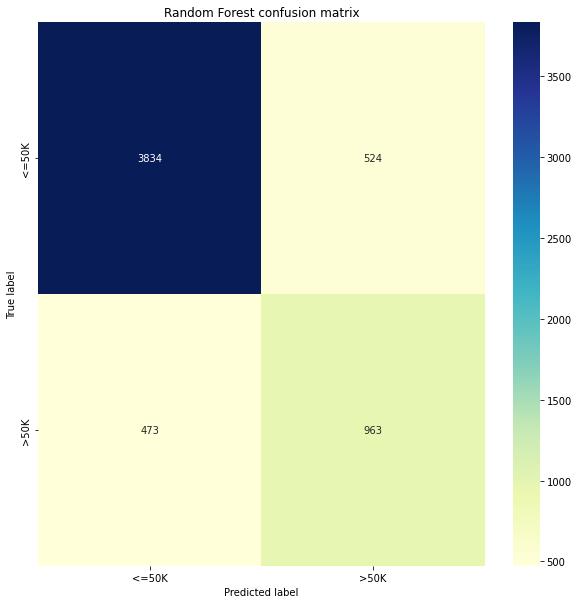

In [45]:
_cm(test_y1, ypred_rf, "Random Forest")

In [46]:
from models import run_knn

results, ypred_knn = run_knn(20,2, train_x1,train_y1,test_x1,test_y1); results

{'Model': 'KNN',
 'Accuracy': 0.8296513634794616,
 'F1-Score': 0.7506714570322217,
 'Fit-Time': 0.0028449000001273816,
 'Predict-Time': 2.868547099999887}

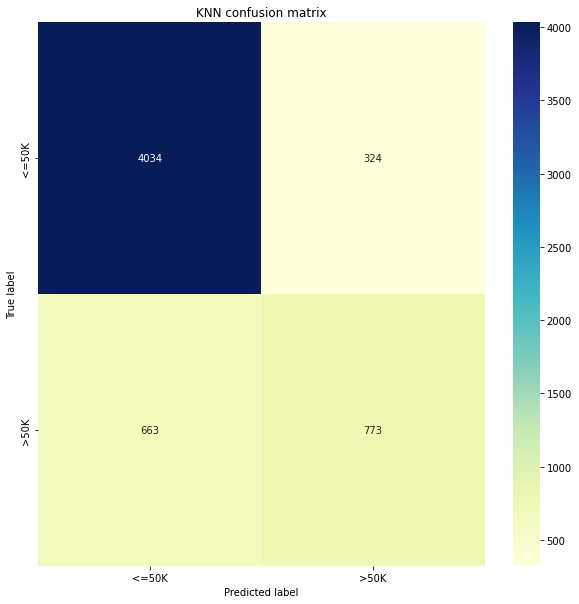

In [47]:
_cm(test_y1, ypred_knn, "KNN")

In [48]:
from models import run_SVM

results, ypred_svm = run_SVM(train_x1,train_y1,test_x1,test_y1); results

{'Model': 'SVM',
 'Accuracy': 0.8363824646185709,
 'F1-Score': 0.6229116945107398,
 'Fit-Time': 14.25094769999987,
 'Predict-Time': 1.8633432000001449}

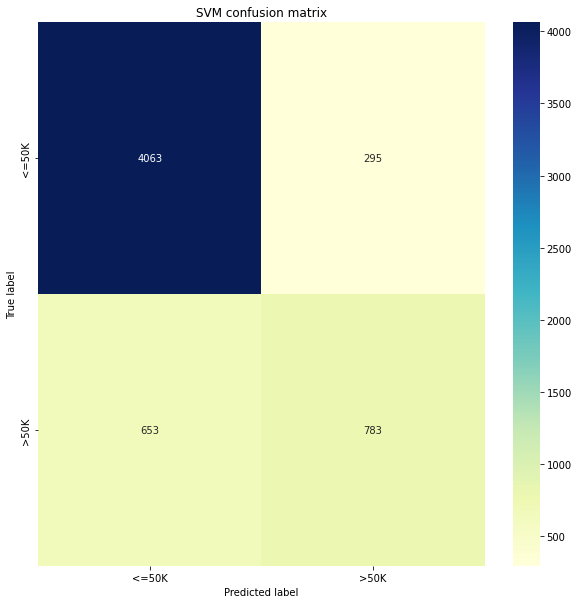

In [49]:
_cm(test_y1, ypred_svm, "SVM")

In [50]:
from models import cnn

results, ypred_cnn = cnn(train_x1,train_y1,test_x1,test_y1); results

{'Model': 'CNN',
 'Accuracy': 0.8215395212173462,
 'F1-Score': 0.5680868838763575,
 'Fit-Time': 42.00609149999991,
 'Predict-Time': 0.5252038000003267}

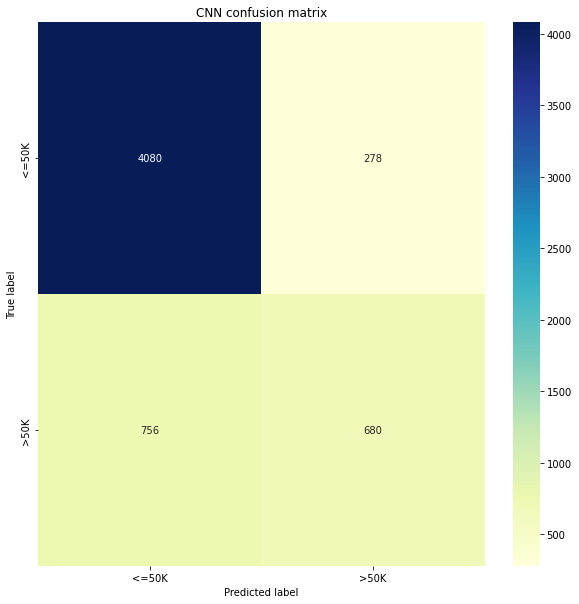

In [51]:
_cm(test_y1, ypred_cnn, "CNN")